In [ ]:
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='talk')

folder = 'figures'

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering', flotilla_dir=flotilla_dir)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


In [3]:
from __future__ import print_function

In [27]:
study.splicing.maybe_renamed_to_feature_id("PKM")

Index([u'exon:chr15:72499069-72499221:-@exon:chr15:72494795-72494961:-@exon:chr15:72492849-72492996:-',
       u'exon:chr15:72499069-72499221:-@exon:chr15:72495363-72495529:-@exon:chr15:72492815-72492996:-',
       u'exon:chr15:72523457-72523547:-@exon:chr15:72513509-72513625:-@exon:chr15:72511285-72511451:-',
       u'exon:chr15:72499069-72499221:-@exon:chr15:72495363-72495529:-@exon:chr15:72494795-72494961:-@exon:chr15:72492815-72492996:-'],
      dtype='object')

In [4]:
miso_psi_filename = '/projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnms/splicing.csv.gz'
miso_psi = pd.read_csv(miso_psi_filename, index_col=0, compression='gzip')
print(miso_psi.shape)
miso_psi.head()

(275, 63201)


,chr10:100148111:100148265:-@chr10:100147622:100147841:-@chr10:100146958:100147064:-,chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-,chr10:100150839:100150628|100150767:-@chr10:100150355:100150511:-,chr10:100170715:100170370|100170696:-@chr10:100167661:100167754:-,chr10:100174766:100174978:-@chr10:100174489:100174591:-@chr10:100173705:100174052:-,chr10:100185575:100185742:-@chr10:100185441|100185477:100185298:-,chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,chr10:100193697:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,chr10:100193740:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,...,chrY:59222127:59222216|59222281:+@chrY:59230782:59230919:+,chrY:59222127:59222277|59222281:+@chrY:59230782:59230919:+,chrY:59222127:59222281:+@chrY:59228292:59228349:+@chrY:59230782:59230919:+,chrY:59233167:59233257:+@chrY:59252483:59252550:+@chrY:59272371:59272463:+,chrY:6780129:6780213:+@chrY:6846254:6846284:+@chrY:6863845:6863939:+@chrY:6889490:6889578:+,chrY:6846254:6846284:+@chrY:6863845:6863939:+@chrY:6889490:6889578:+,chrY:6889490:6889578:+@chrY:6893076:6893183:+@chrY:6911021:6911166:+,chrY:6931938:6932190:+@chrY:6934736:6934869:+@chrY:6938237:6938369:+,chrY:9236076-9236162:+@chrY:9236424-9236561:+,chrY:9365535-9365621:+@chrY:9365883-9366020:+
M1_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1_02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1_03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.87,0.82,0.94,0.97,NaN,NaN,NaN,NaN,NaN,NaN
M1_04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1_05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
miso_psi_tidy = miso_psi.unstack().reset_index()
miso_psi_tidy = miso_psi_tidy.rename(columns={'level_0':'miso_id', 'level_1':'sample_id', 0:'miso_psi'})
print(miso_psi_tidy.shape)
miso_psi_tidy = miso_psi_tidy.dropna()
print(miso_psi_tidy.shape)
miso_psi_tidy.head()

(17380275, 3)
(2575320, 3)


,miso_id,sample_id,miso_psi
274,chr10:100148111:100148265:-@chr10:100147622:10...,CVN_35,0.92
487,chr10:100150355:100150511:-@chr10:100148111:10...,N3_10,0.04
549,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15
824,chr10:100150839:100150628|100150767:-@chr10:10...,CVN_35,0.17
1037,chr10:100170715:100170370|100170696:-@chr10:10...,N3_10,0.02


In [21]:
miso_psi_tidy['n_exons'] = miso_psi_tidy['miso_id'].map(lambda x: len(x.split('@')))
miso_psi_tidy.head()

,miso_id,sample_id,miso_psi,n_exons
274,chr10:100148111:100148265:-@chr10:100147622:10...,CVN_35,0.92,3
487,chr10:100150355:100150511:-@chr10:100148111:10...,N3_10,0.04,3
549,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,3
824,chr10:100150839:100150628|100150767:-@chr10:10...,CVN_35,0.17,2
1037,chr10:100170715:100170370|100170696:-@chr10:10...,N3_10,0.02,2


Use only SE and MXE events

In [58]:
miso_psi_tidy = miso_psi_tidy.loc[miso_psi_tidy['n_exons'] >= 3]
miso_psi_tidy.shape

(1606532, 4)

In [59]:
outrigger_tidy = study.splicing.data.unstack().reset_index()
outrigger_tidy = outrigger_tidy.rename(columns={'level_0':'outrigger_id', 'level_1':'sample_id', 0:'outrigger_psi'})
print(outrigger_tidy.shape)
outrigger_tidy = outrigger_tidy.dropna()
print(outrigger_tidy.shape)
outrigger_tidy.head()

(3337440, 3)
(979111, 3)


,outrigger_id,sample_id,outrigger_psi
33,exon:chr10:100190328-100190427:-@exon:chr10:10...,CVN_35,1
87,exon:chr10:100190328-100190427:-@exon:chr10:10...,M2nd_34,0
150,exon:chr10:100190328-100190427:-@exon:chr10:10...,P1_06,1
154,exon:chr10:100190328-100190427:-@exon:chr10:10...,P1_10,0
159,exon:chr10:100190328-100190427:-@exon:chr10:10...,P2_03,0


In [60]:
outrigger_tidy['outrigger_id'].head().values

array([ 'exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-',
       'exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-',
       'exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-',
       'exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-',
       'exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-'], dtype=object)

In [61]:
rows = outrigger_tidy['outrigger_id'].str.startswith('exon:chr10:1001503')
outrigger_tidy['outrigger_id'][rows].head().values

array([], dtype=object)

In [62]:
miso_psi_tidy['miso_id'].head().values

array([ 'chr10:100148111:100148265:-@chr10:100147622:100147841:-@chr10:100146958:100147064:-',
       'chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-',
       'chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-',
       'chr10:100174766:100174978:-@chr10:100174489:100174591:-@chr10:100173705:100174052:-',
       'chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-'], dtype=object)

In [65]:
import re

s = 'exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-'
pattern = '-(?=\d)'
re.sub(pattern, ':', s)

'exon:chr10:100190328:100190427:-@exon:chr10:100189548:100189646:-@exon:chr10:100189330:100189399:-'

In [66]:
outrigger_tidy['miso_id'] = outrigger_tidy['outrigger_id'].map(lambda x: re.sub(pattern, ':', x).replace('exon:', ''))
outrigger_tidy.head()

,outrigger_id,sample_id,outrigger_psi,miso_id
33,exon:chr10:100190328-100190427:-@exon:chr10:10...,CVN_35,1,chr10:100190328:100190427:-@chr10:100189548:10...
87,exon:chr10:100190328-100190427:-@exon:chr10:10...,M2nd_34,0,chr10:100190328:100190427:-@chr10:100189548:10...
150,exon:chr10:100190328-100190427:-@exon:chr10:10...,P1_06,1,chr10:100190328:100190427:-@chr10:100189548:10...
154,exon:chr10:100190328-100190427:-@exon:chr10:10...,P1_10,0,chr10:100190328:100190427:-@chr10:100189548:10...
159,exon:chr10:100190328-100190427:-@exon:chr10:10...,P2_03,0,chr10:100190328:100190427:-@chr10:100189548:10...


In [67]:
outrigger_tidy['miso_id'].head().values

array([ 'chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-',
       'chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-',
       'chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-',
       'chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-',
       'chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-'], dtype=object)

In [68]:
merge_cols = ['miso_id', 'sample_id']
splicing_tidy = outrigger_tidy.merge(miso_psi_tidy, left_on=merge_cols, right_on=merge_cols, how='outer')
print(splicing_tidy.shape)
splicing_tidy.head()

(2412159, 6)


,outrigger_id,sample_id,outrigger_psi,miso_id,miso_psi,n_exons
0,exon:chr10:100190328-100190427:-@exon:chr10:10...,CVN_35,1,chr10:100190328:100190427:-@chr10:100189548:10...,0.76,3
1,exon:chr10:100190328-100190427:-@exon:chr10:10...,M2nd_34,0,chr10:100190328:100190427:-@chr10:100189548:10...,NaN,NaN
2,exon:chr10:100190328-100190427:-@exon:chr10:10...,P1_06,1,chr10:100190328:100190427:-@chr10:100189548:10...,NaN,NaN
3,exon:chr10:100190328-100190427:-@exon:chr10:10...,P1_10,0,chr10:100190328:100190427:-@chr10:100189548:10...,0.03,3
4,exon:chr10:100190328-100190427:-@exon:chr10:10...,P2_03,0,chr10:100190328:100190427:-@chr10:100189548:10...,0.02,3


In [70]:
splicing_tidy = splicing_tidy.fillna(-0.1)
splicing_tidy.head()

,outrigger_id,sample_id,outrigger_psi,miso_id,miso_psi,n_exons
0,exon:chr10:100190328-100190427:-@exon:chr10:10...,CVN_35,1,chr10:100190328:100190427:-@chr10:100189548:10...,0.76,3.0
1,exon:chr10:100190328-100190427:-@exon:chr10:10...,M2nd_34,0,chr10:100190328:100190427:-@chr10:100189548:10...,-0.10,-0.1
2,exon:chr10:100190328-100190427:-@exon:chr10:10...,P1_06,1,chr10:100190328:100190427:-@chr10:100189548:10...,-0.10,-0.1
3,exon:chr10:100190328-100190427:-@exon:chr10:10...,P1_10,0,chr10:100190328:100190427:-@chr10:100189548:10...,0.03,3.0
4,exon:chr10:100190328-100190427:-@exon:chr10:10...,P2_03,0,chr10:100190328:100190427:-@chr10:100189548:10...,0.02,3.0


In [71]:
splicing_tidy_subset = splicing_tidy.query('sample_id == "N2_06"')
splicing_tidy_subset.head()

,outrigger_id,sample_id,outrigger_psi,miso_id,miso_psi,n_exons
84,exon:chr10:101165513-101165617:-@exon:chr10:10...,N2_06,1,chr10:101165513:101165617:-@chr10:101163481:10...,-0.1,-0.1
690,exon:chr10:102114184-102114389:+@exon:chr10:10...,N2_06,1,chr10:102114184:102114389:+@chr10:102116289:10...,-0.1,-0.1
890,exon:chr10:102286732-102286831:-@exon:chr10:10...,N2_06,1,chr10:102286732:102286831:-@chr10:102286156:10...,-0.1,-0.1
1087,exon:chr10:102747070-102747240:-@exon:chr10:10...,N2_06,1,chr10:102747070:102747240:-@chr10:102746847:10...,-0.1,-0.1
1216,exon:chr10:103190102-103190209:+@exon:chr10:10...,N2_06,1,chr10:103190102:103190209:+@chr10:103213258:10...,-0.1,-0.1


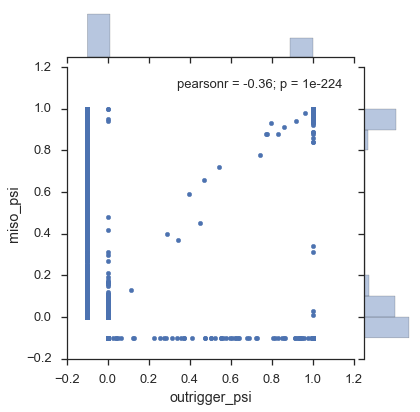

In [72]:
sns.jointplot(x='outrigger_psi', y='miso_psi', data=splicing_tidy_subset)

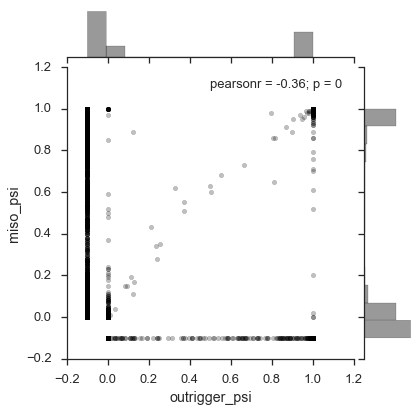

In [78]:
splicing_tidy_subset = splicing_tidy.query('sample_id == "P9_02"')
sns.jointplot(x='outrigger_psi', y='miso_psi', data=splicing_tidy_subset, joint_kws=dict(alpha=0.25), color='k')

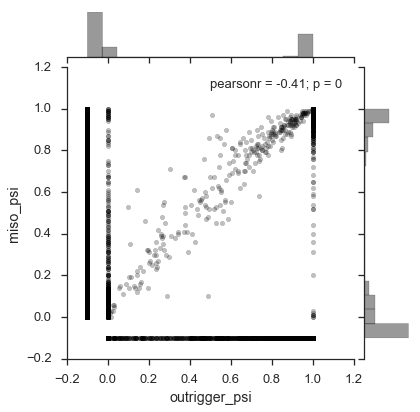

In [77]:
splicing_tidy_subset = splicing_tidy.query('sample_id == "M2_05"')
sns.jointplot(x='outrigger_psi', y='miso_psi', data=splicing_tidy_subset, alpha=0.25, color='k')